<a href="https://colab.research.google.com/github/vikpy/mtechdatascience_mlcourse/blob/master/lec6_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Math and data processing 
import numpy as np
import scipy as sp 
import pandas as pd

# scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc 

# Visualization 
from IPython.display import display 
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use("ggplot")

In [0]:
# SVC Plot Functions 

In [0]:
def plot_svc(svc, X, y, h=0.02, pad=0.025):
  x_min, x_max = X[:,0].min() - pad, X[:,0].max() + pad
  y_min, y_max = X[:,1].min() - pad, X[:,1].max() + pad
  xx , yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z  = svc.predict(np.c_[xx.ravel(), yy.ravel()])

  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha = 0.2)

  plt.scatter(X[:, 0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
  # Support vector indeicated in plot by vertical lines 
  sv = svc.support_vectors_
  plt.scatter(sv[:, 0], sv[:, 1], c = 'k', marker = 'x', s = 100, linewidths='1')
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.show()
  print("Number of Support Vectors: ", svc.support_.size)

In [0]:
# Support Vector Classsifier 


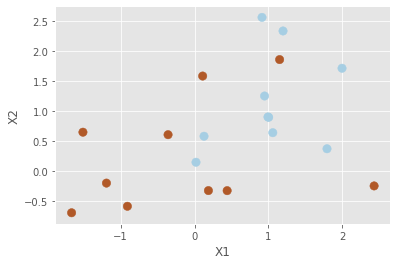

In [3]:
# Generating random data: 20 observations of 2 features and divide into two classifier 
np.random.seed(5)
X = np.random.randn(20, 2)
y = np.repeat([1, -1], 10)
X[y == -1] = X[y  == -1] + 1
plt.scatter(X[:, 0], X[:, 1],s = 70, c = y, cmap=plt.cm.Paired)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [4]:
svc = SVC(C=1, kernel= "linear")
svc.fit(X, y)
sv = svc.support_vectors_
print(sv)

[[ 0.01939211  0.14314685]
 [ 0.12812082  0.57749207]
 [ 1.05914424  0.63668912]
 [ 1.00328884  0.89406956]
 [ 1.79305332  0.36842837]
 [ 0.99380509  0.89893239]
 [ 0.94769185  1.24921766]
 [ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]
 [ 0.10960984  1.58248112]
 [ 0.18760323 -0.32986996]
 [-0.35882895  0.6034716 ]
 [ 1.15139101  1.85733101]]


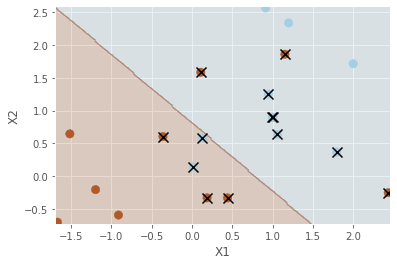

Number of Support Vectors:  13


In [0]:
plot_svc(svc, X, y)

[[ 0.01939211  0.14314685]
 [ 0.12812082  0.57749207]
 [ 1.99643983  1.71242127]
 [ 1.05914424  0.63668912]
 [ 1.00328884  0.89406956]
 [ 1.79305332  0.36842837]
 [ 0.99380509  0.89893239]
 [ 0.94769185  1.24921766]
 [ 1.19766009  2.33484857]
 [ 0.91312439  2.56153229]
 [ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]
 [ 0.10960984  1.58248112]
 [-0.9092324  -0.59163666]
 [ 0.18760323 -0.32986996]
 [-1.19276461 -0.20487651]
 [-0.35882895  0.6034716 ]
 [-1.66478853 -0.70017904]
 [ 1.15139101  1.85733101]
 [-1.51117956  0.64484751]]


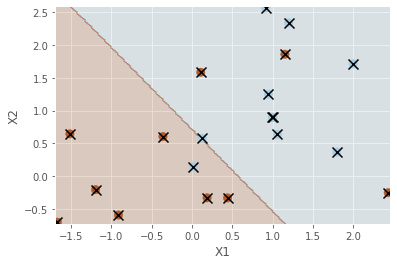

Number of Support Vectors:  20


In [0]:
# When using a smaller cost parameter (C = 0.01) the margins wider . resulting in more support vector
svc2 = SVC(C=0.01, kernel= "linear")
svc2.fit(X, y)
sv2 = svc2.support_vectors_
print(sv2)
plot_svc(svc2, X, y)

[[ 0.01939211  0.14314685]
 [ 0.12812082  0.57749207]
 [ 1.99643983  1.71242127]
 [ 1.05914424  0.63668912]
 [ 1.00328884  0.89406956]
 [ 1.79305332  0.36842837]
 [ 0.99380509  0.89893239]
 [ 0.94769185  1.24921766]
 [ 1.19766009  2.33484857]
 [ 0.91312439  2.56153229]
 [ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]
 [ 0.10960984  1.58248112]
 [-0.9092324  -0.59163666]
 [ 0.18760323 -0.32986996]
 [-1.19276461 -0.20487651]
 [-0.35882895  0.6034716 ]
 [-1.66478853 -0.70017904]
 [ 1.15139101  1.85733101]
 [-1.51117956  0.64484751]]


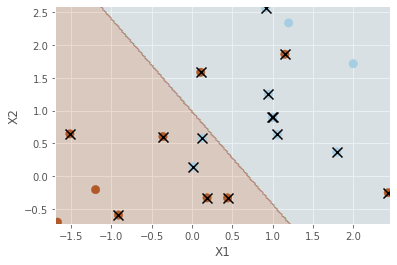

Number of Support Vectors:  16


In [0]:
# When using a smaller cost parameter (C = 0.01) the marginis wider . resulting in more support vector
svc3 = SVC(C=0.1, kernel= "linear")
svc3.fit(X, y)
sv3 = svc3.support_vectors_
print(sv2)
plot_svc(svc3, X, y)

[[ 0.01939211  0.14314685]
 [ 0.12812082  0.57749207]
 [ 1.05914424  0.63668912]
 [ 1.00328884  0.89406956]
 [ 1.79305332  0.36842837]
 [ 0.99380509  0.89893239]
 [ 0.94769185  1.24921766]
 [ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]
 [ 0.10960984  1.58248112]
 [ 0.18760323 -0.32986996]
 [-0.35882895  0.6034716 ]
 [ 1.15139101  1.85733101]]


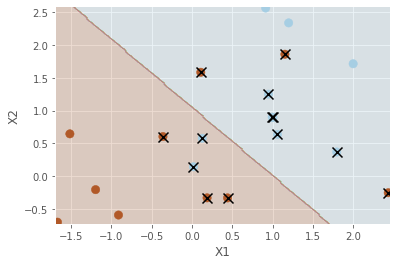

Number of Support Vectors:  13


In [0]:
# When using a smaller cost parameter (C = 0.01) the margins wider . resulting in more support vector
svc4 = SVC(C=10, kernel= "linear")
svc4.fit(X, y)
sv4 = svc4.support_vectors_
print(sv4)
plot_svc(svc4, X, y)

In [0]:
# Selecting the optimal cost parameter using cross validation 
tuning_parms = [{ "C" : [0.001, 0.01, 0.1, 1 , 5, 10, 100] }]
clf = GridSearchCV(SVC(kernel="linear"), tuning_parms, cv = 10, scoring="accuracy")
clf.fit(X, y)
pd.DataFrame(clf.cv_results_)[["mean_test_score", "std_test_score", "params"]]


,mean_test_score,std_test_score,params
0,0.80,0.244949,{'C': 0.001}
1,0.80,0.244949,{'C': 0.01}
2,0.80,0.244949,{'C': 0.1}
3,0.75,0.335410,{'C': 1}
4,0.75,0.335410,{'C': 5}
5,0.75,0.335410,{'C': 10}
6,0.75,0.335410,{'C': 100}


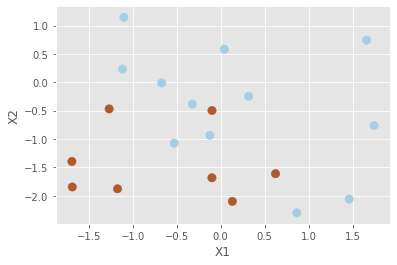

In [0]:
# test data
np.random.seed(1)
X_test = np.random.randn(20, 2)
y_test = np.random.choice([1,-1], 20)

X_test[y_test == 1]  = X_test[y_test == 1] - 1
plt.scatter(X_test[:, 0], X_test[:, 1],s = 70, c = y_test, cmap=plt.cm.Paired)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [0]:
# Prediction with C = 0.01
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_pred, y_test), index = svc.classes_, columns=svc.classes_)

,-1,1
-1,2,0
1,10,8


In [0]:
# Prediction with C = 0.1
y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_pred, y_test), index = svc3.classes_, columns=svc3.classes_)

,-1,1
-1,2,0
1,10,8


In [0]:
# Prediction with C = 10
y_pred = svc4.predict(X_test)
pd.DataFrame(confusion_matrix(y_pred, y_test), index = svc4.classes_, columns=svc4.classes_)

,-1,1
-1,2,0
1,10,8


In [0]:
# SUpport vector Machine 

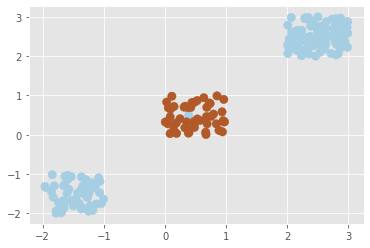

In [13]:
# generate random data 
np.random.seed(8)
X = np.random.rand(200, 2)

X[:100] = X[:100]  + 2
X[101:150] = X[101:150] - 2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1, 50)])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, random_state = 2)
plt.scatter(X[:,0], X[:,1], s=70, c = y, cmap=plt.cm.Paired)


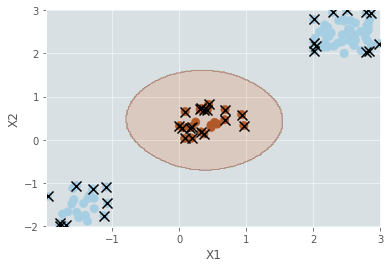

Number of Support Vectors:  38


In [14]:
svm  = SVC(C =0.1, kernel = "rbf", gamma = 1)
svm.fit(X_train, y_train)
plot_svc(svm, X_train, y_train)

In [0]:
tuning_parameters = [{ "C" : [0.01, 0.1, 1, 10, 4], "gamma" : [0.5, 1, 2, 3, 4] }]
clf = GridSearchCV(SVC(kernel="rbf"), tuning_parameters, cv = 10, scoring="accuracy")
clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_)[["mean_test_score", "std_test_score", "params"]]

,mean_test_score,std_test_score,params
0,0.77,0.045826,"{'C': 0.01, 'gamma': 0.5}"
1,0.77,0.045826,"{'C': 0.01, 'gamma': 1}"
2,0.77,0.045826,"{'C': 0.01, 'gamma': 2}"
3,0.77,0.045826,"{'C': 0.01, 'gamma': 3}"
4,0.77,0.045826,"{'C': 0.01, 'gamma': 4}"
5,1.00,0.000000,"{'C': 0.1, 'gamma': 0.5}"
6,1.00,0.000000,"{'C': 0.1, 'gamma': 1}"
7,1.00,0.000000,"{'C': 0.1, 'gamma': 2}"
8,1.00,0.000000,"{'C': 0.1, 'gamma': 3}"
9,0.98,0.040000,"{'C': 0.1, 'gamma': 4}"
